In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = yf.download(['^GSPC', '^VIX'], start='2000-01-01', end='2020-04-01', progress=False)
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})
df

,sp500,vix
Date,,
1999-12-31,1469.250000,24.639999
2000-01-03,1455.219971,24.209999
2000-01-04,1399.420044,27.010000
2000-01-05,1402.109985,26.410000
2000-01-06,1403.449951,25.730000
...,...,...
2020-03-25,2475.560059,63.950001
2020-03-26,2630.070068,61.000000
2020-03-27,2541.469971,65.540001


In [22]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

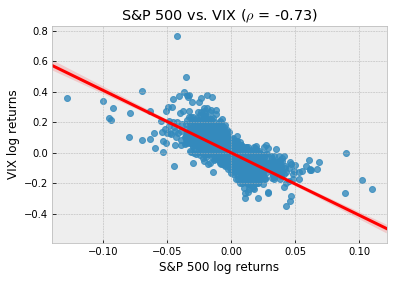

In [37]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)
ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df, line_kws={'color':'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})', ylabel='VIX log returns', xlabel='S&P 500 log returns')
plt.style.use('bmh')

-0.7298504429609561